### Lib

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
%matplotlib inline

### Vars

In [9]:
img_url = '/home/guillaume/Téléchargements/mushroom-dataset/dataset_images/'
dataset_url = "../../storage/datas/clean/full_cleaned_dataset.csv"

### CSV Dataset

In [3]:
# Importer les DF à analyser
cleaned_dataset=pd.read_csv(dataset_url, low_memory=False)

In [4]:
print("Classification repartition:")
print("phylum:",cleaned_dataset['phylum'].nunique())
print("class:",cleaned_dataset['class'].nunique())
print("order:",cleaned_dataset['order'].nunique())
print("family:",cleaned_dataset['family'].nunique())
print("genus:",cleaned_dataset['genus'].nunique())
print("species:",cleaned_dataset['species'].nunique())

Classification repartition:
phylum: 4
class: 27
order: 99
family: 331
genus: 1564
species: 8423


In [16]:
cleaned_dataset.head(1)

,image_lien,label,family,phylum,species,canonicalName,class,genus,order
0,1.jpg,Xylaria polymorpha,Xylariaceae,Ascomycota,Xylaria polymorpha,Xylaria polymorpha,Sordariomycetes,Xylaria,Xylariales


### Repartitions

#### Phylum

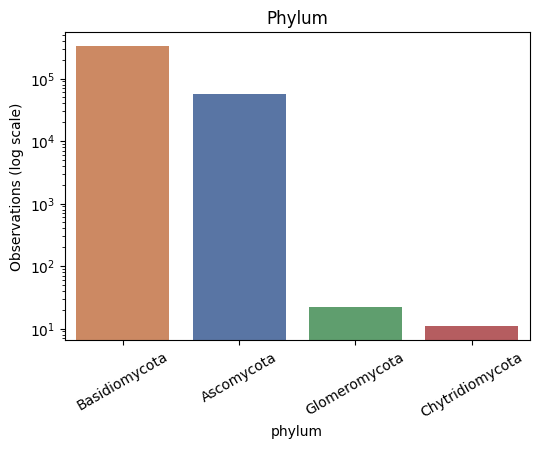

In [69]:
plt.figure(figsize=(6,4))

sns.countplot(data = cleaned_dataset,
              x = 'phylum',
              hue='phylum',
              order = cleaned_dataset["phylum"].value_counts().index,
              palette='deep',
              legend=False)

plt.title("Phylum")
plt.xticks(rotation=30)
plt.ylabel("Observations (log scale)")
plt.yscale("log")
plt.show();

#### Class

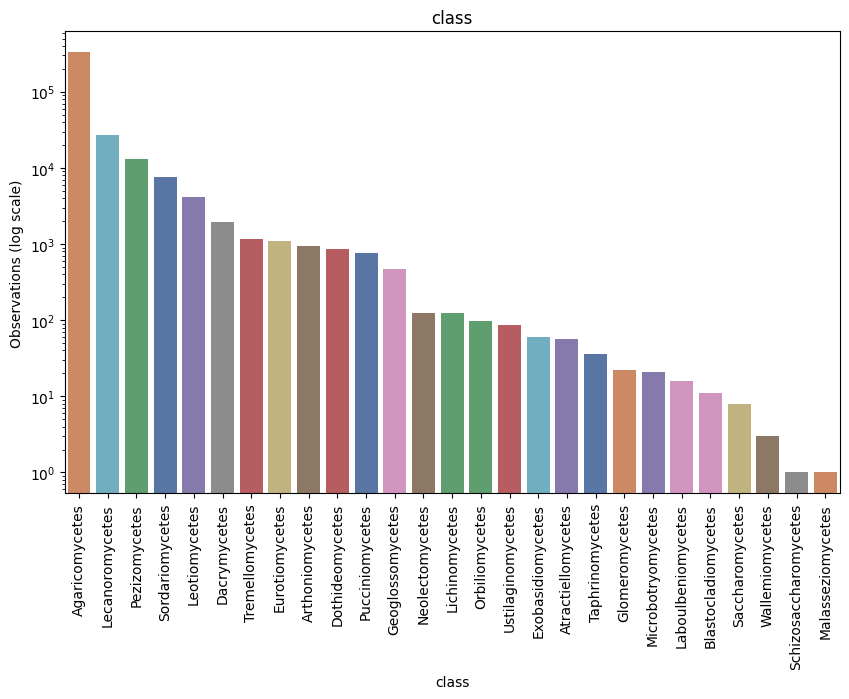

In [78]:
plt.figure(figsize=(10,6))

sns.countplot(data = cleaned_dataset,
              x = 'class',
              hue='class',
              order = cleaned_dataset["class"].value_counts().index,
              palette='deep',
              legend=False)

plt.title("class")
plt.xticks(rotation=90)
plt.ylabel("Observations (log scale)")
plt.yscale("log")
plt.show();

#### Order

In [70]:
cleaned_dataset['order'].nunique()

99

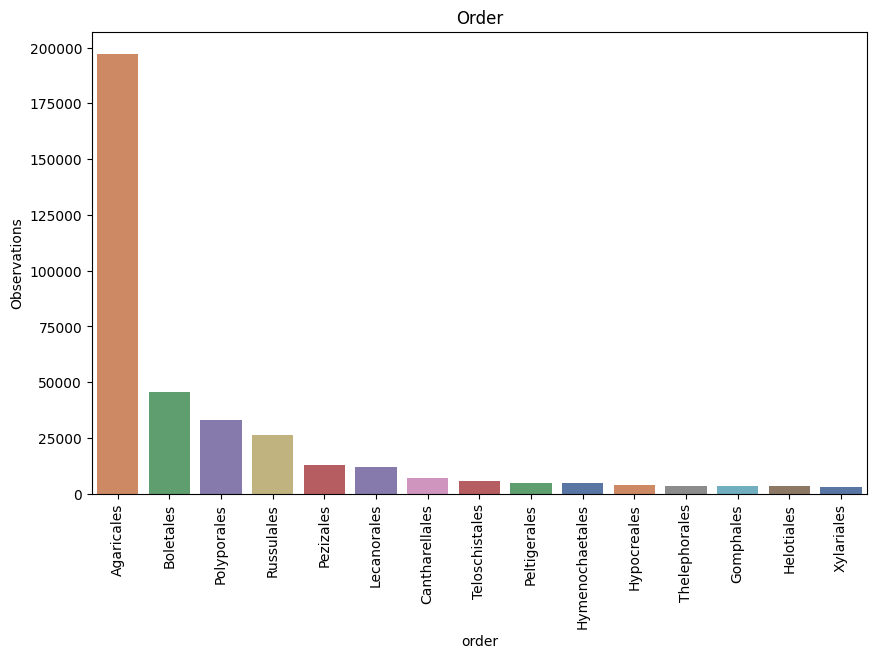

In [73]:
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le nombre de valeurs uniques à afficher
num_unique_values = 15

# Obtenir les valeurs les plus fréquentes
top_values = cleaned_dataset['order'].value_counts().index[:num_unique_values]

# Filtrer le dataset pour ne contenir que les valeurs les plus fréquentes
filtered_dataset = cleaned_dataset[cleaned_dataset['order'].isin(top_values)]

# Créer le graphique
plt.figure(figsize=(10,6))
sns.countplot(data = filtered_dataset,
              x = 'order',
              hue = 'order',
              order = filtered_dataset["order"].value_counts().index,
              palette='deep',
              legend = False)

plt.title("Order")
plt.xticks(rotation=90)
plt.ylabel("Observations")
plt.show()

#### Family

In [71]:
cleaned_dataset['family'].nunique()

331

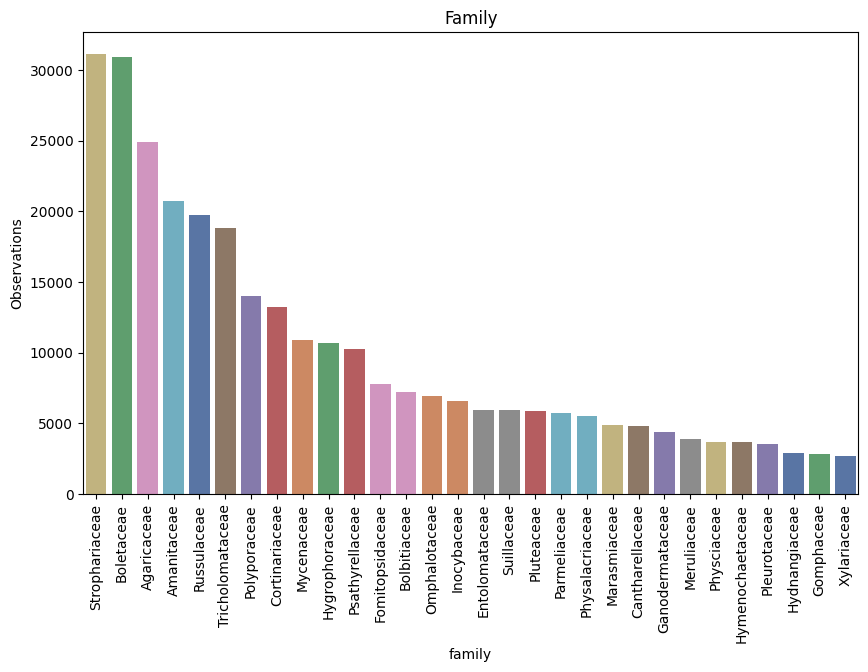

In [79]:
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le nombre de valeurs uniques à afficher
num_unique_values = 30

# Obtenir les valeurs les plus fréquentes
top_values = cleaned_dataset['family'].value_counts().index[:num_unique_values]

# Filtrer le dataset pour ne contenir que les valeurs les plus fréquentes
filtered_dataset = cleaned_dataset[cleaned_dataset['family'].isin(top_values)]

# Créer le graphique
plt.figure(figsize=(10,6))
sns.countplot(data = filtered_dataset,
              x = 'family',
              hue = 'family',
              order = filtered_dataset["family"].value_counts().index,
              palette='deep',
              legend = False)

plt.title("Family")
plt.xticks(rotation=90)
plt.ylabel("Observations")
plt.show()

#### Genus

In [ ]:
cleaned_dataset['genus'].nunique()

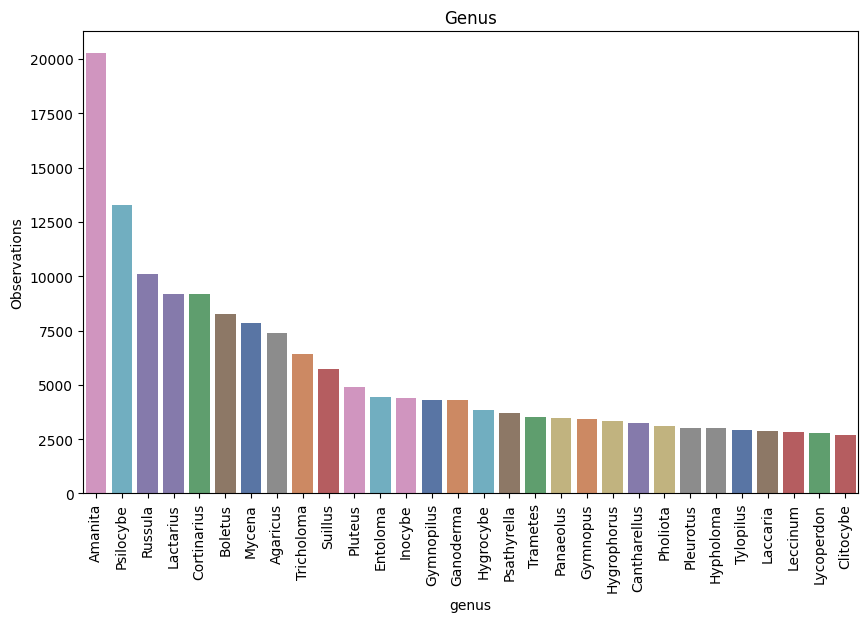

In [80]:
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le nombre de valeurs uniques à afficher
num_unique_values = 30

# Obtenir les valeurs les plus fréquentes
top_values = cleaned_dataset['genus'].value_counts().index[:num_unique_values]

# Filtrer le dataset pour ne contenir que les valeurs les plus fréquentes
filtered_dataset = cleaned_dataset[cleaned_dataset['genus'].isin(top_values)]

# Créer le graphique
plt.figure(figsize=(10,6))
sns.countplot(data = filtered_dataset,
              x = 'genus',
              hue = 'genus',
              order = filtered_dataset["genus"].value_counts().index,
              palette='deep',
              legend = False)

plt.title("Genus")
plt.xticks(rotation=90)
plt.ylabel("Observations")
plt.show()

#### Species

In [87]:
cleaned_dataset['species'].nunique()

8423

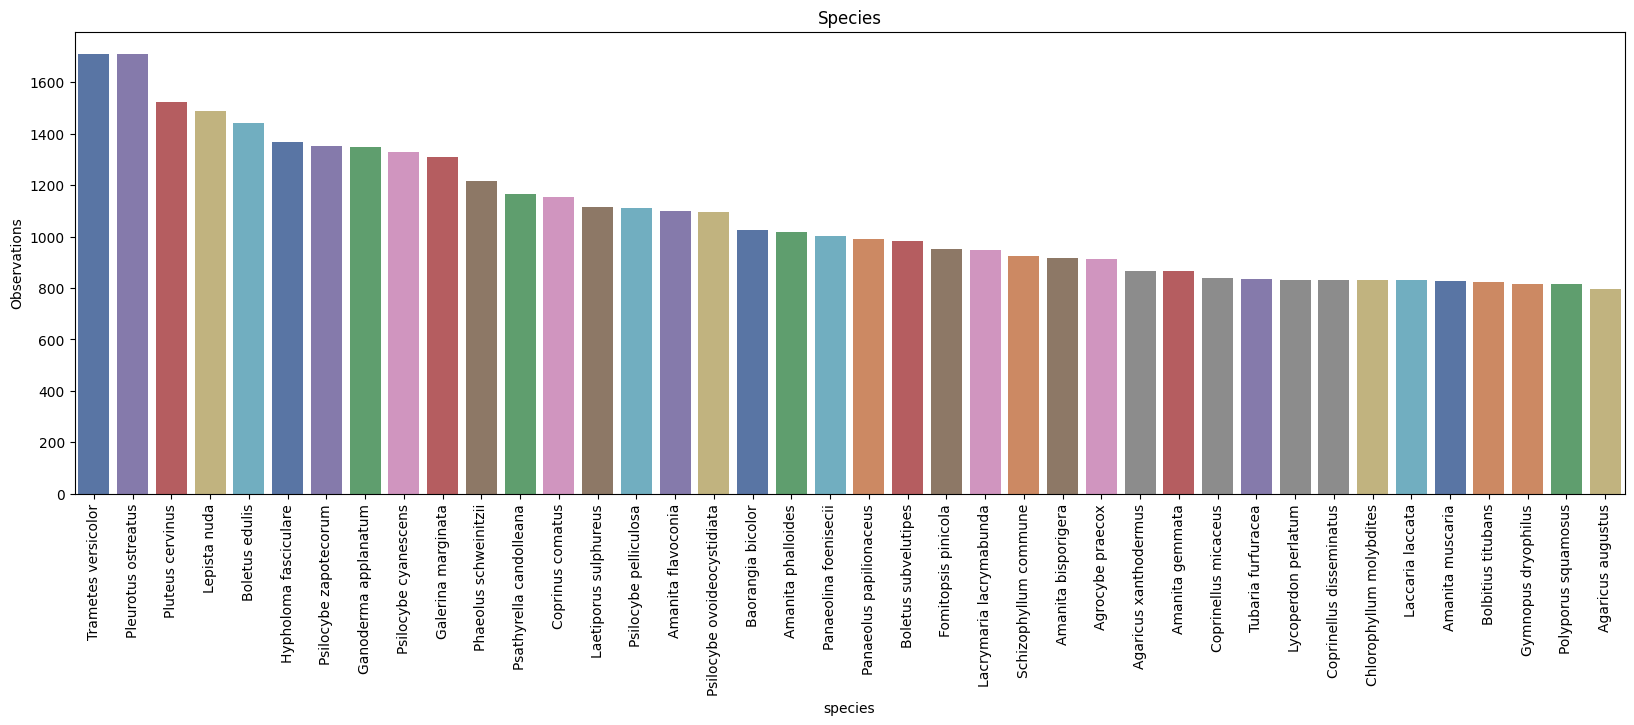

In [86]:
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le nombre de valeurs uniques à afficher
num_unique_values = 40

# Obtenir les valeurs les plus fréquentes
top_values = cleaned_dataset['species'].value_counts().index[:num_unique_values]

# Filtrer le dataset pour ne contenir que les valeurs les plus fréquentes
filtered_dataset = cleaned_dataset[cleaned_dataset['species'].isin(top_values)]

# Créer le graphique
plt.figure(figsize=(20,6))
sns.countplot(data = filtered_dataset,
              x = 'species',
              hue = 'species',
              order = filtered_dataset["species"].value_counts().index,
              palette='deep',
              legend = False)

plt.title("Species")
plt.xticks(rotation=90)
plt.ylabel("Observations")
plt.show()

In [6]:
# on s'interesse aux espèces représentées
print('Nombre d\'occurences uniques :')
print(cleaned_dataset['species'].nunique())

print('\n Pourcentage d\'apparitions :')
print('\n', (cleaned_dataset['label'].value_counts(normalize = True)*100).round(2))

Nombre d'occurences uniques :
8423

 Pourcentage d'apparitions :

 label
Trametes versicolor            0.44
Pleurotus ostreatus            0.40
Psilocybe zapotecorum          0.35
Psilocybe cyanescens           0.34
Hypholoma fasciculare          0.33
                               ... 
Butyriboletus pseudoregius     0.00
Hypomyces porphyreus           0.00
Russula violaceoincarnata      0.00
Lactarius purpureoechinatus    0.00
Bryoria trichodes              0.00
Name: proportion, Length: 9274, dtype: float64


### Tirages aléatoire d'images

In [28]:
def tirage_aleatoire(df, dataframe_col_label, dataframe_col_url, nb_tirages=5):
    """
    Randomly selects and displays a specified number of images from a dataframe.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing the images.
    - dataframe_col_label (list): The list of labels for each image in the dataframe.
    - dataframe_col_url (list): The list of URLs for each image in the dataframe.
    - nb_tirages (int): The number of images to randomly select and display. Default is 5.

    Returns:
    None
    """
    plt.figure(figsize=(16,16))
    indice_aleatoire = np.random.choice(len(df), size=nb_tirages, replace=False)
    subplot_colonnes = nb_tirages
    subplot_lignes = (nb_tirages + subplot_colonnes - 1) // subplot_colonnes

    for i, j in enumerate(indice_aleatoire):
        plt.subplot(subplot_lignes,subplot_colonnes,i+1)
        plt.subplots_adjust(wspace=1, hspace=0.5)               # Avoid subplots being too close
        img = plt.imread(dataframe_col_url[j])                    # Read the image
        height, width, _ = img.shape                              # Read the dimensions of the image
        plt.axis('off')                                           # Remove axes
        plt.imshow(img)                                           # Display the image
        plt.title(f"{dataframe_col_label[j]}\n{width}x{height}")  # Image title -> Species name and dimensions


In [29]:
df_img_url=cleaned_dataset.copy()
df_img_url['image_lien'] = df_img_url['image_lien'].apply(lambda x: img_url + x)

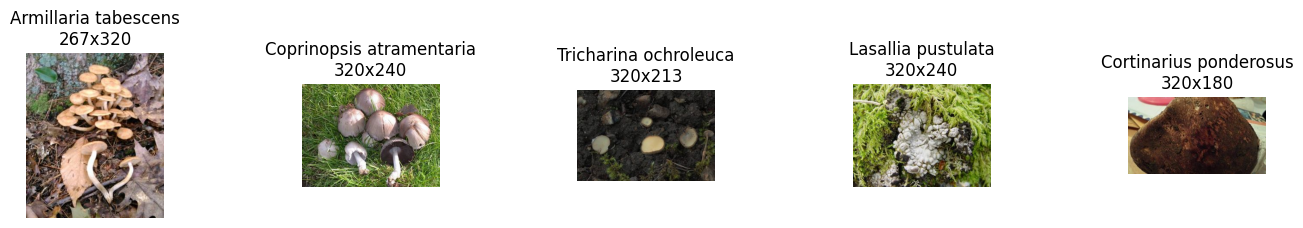

In [54]:
tirage_aleatoire(df=df_img_url,
                 dataframe_col_label=df_img_url['species'],
                 dataframe_col_url=df_img_url['image_lien'],
                 nb_tirages=5)

### Extraction des features des images

In [55]:
def extract_features(url_img):
    """
    Extracts features from an image.

    Parameters:
    url_img (str): The URL or file path of the image.

    Returns:
    dict: A dictionary containing the extracted features:
        - 'largeur': The width of the image.
        - 'hauteur': The height of the image.
        - 'moyenne_rouge': The average red channel value of the image.
        - 'moyenne_vert': The average green channel value of the image.
        - 'moyenne_bleu': The average blue channel value of the image.
    """
    img = cv2.imread(url_img)
    hauteur, largeur, canal = img.shape
    features = {
        'largeur': largeur,
        'hauteur': hauteur,
        'moyenne_rouge': np.mean(img[:,:,2]),
        'moyenne_vert': np.mean(img[:,:,1]),
        'moyenne_bleu': np.mean(img[:,:,0])}
    
    return features

In [60]:
# Extraction des features des images de dans un DF nommé 'features_df'
liste_features = []

for index, row in df_img_url.iterrows():
    filepath = row['image_lien']
    features = extract_features(filepath)
    liste_features.append(features)

features_df = pd.DataFrame(liste_features)
features_df['moyenne_couleurs'] = (features_df['moyenne_rouge']\
                                   + features_df['moyenne_vert']\
                                    + features_df['moyenne_bleu']) / 3

features_df.to_csv('../../storage/datas/clean/img_features.csv', index=False)
features_df.head()

,largeur,hauteur,moyenne_rouge,moyenne_vert,moyenne_bleu,moyenne_couleurs
0,320,240,77.321185,72.687839,70.582227,73.530417
1,320,240,71.123307,64.609049,62.255977,65.996111
2,320,240,84.582305,70.401758,54.611263,69.865109
3,240,320,28.234687,27.118841,23.883490,26.412339
4,240,320,41.552617,35.021029,26.419349,34.330998


In [61]:
features_df.describe()

,largeur,hauteur,moyenne_rouge,moyenne_vert,moyenne_bleu,moyenne_couleurs
count,388024.000000,388024.000000,388024.000000,388024.000000,388024.000000,388024.000000
mean,306.466474,248.857029,108.480408,99.958924,83.653073,97.364135
std,32.996635,38.338392,36.357114,34.485057,36.596810,34.103084
min,60.000000,36.000000,0.605096,1.251548,0.282886,1.502677
25%,320.000000,240.000000,84.212705,77.254434,58.531236,75.011770
50%,320.000000,240.000000,106.036120,98.209408,80.166718,95.189399
75%,320.000000,241.000000,128.383016,118.406777,103.158566,115.241439
max,320.000000,320.000000,253.050648,250.210555,250.294187,250.256192


In [68]:
features_df.to_csv('../../storage/datas/clean/img_features.csv', index=False)


<Figure size 1600x1200 with 0 Axes>

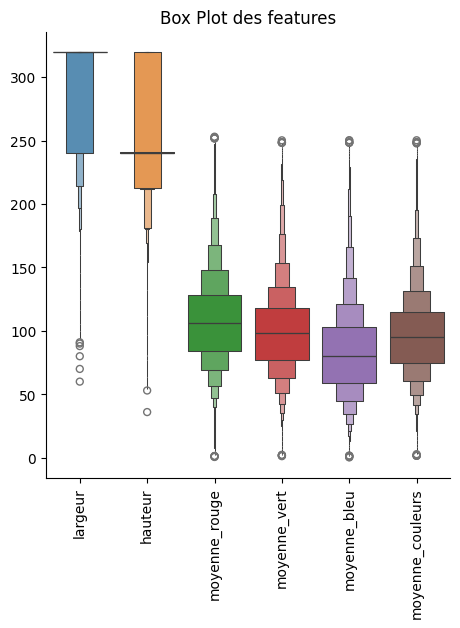

In [62]:
# Boxplot des features
plt.figure(figsize=(16,12))
sns.catplot(features_df, kind='boxen')
plt.grid(False)
plt.title('Box Plot des features')
plt.xticks(rotation = 90);

### Analyses des dimensions

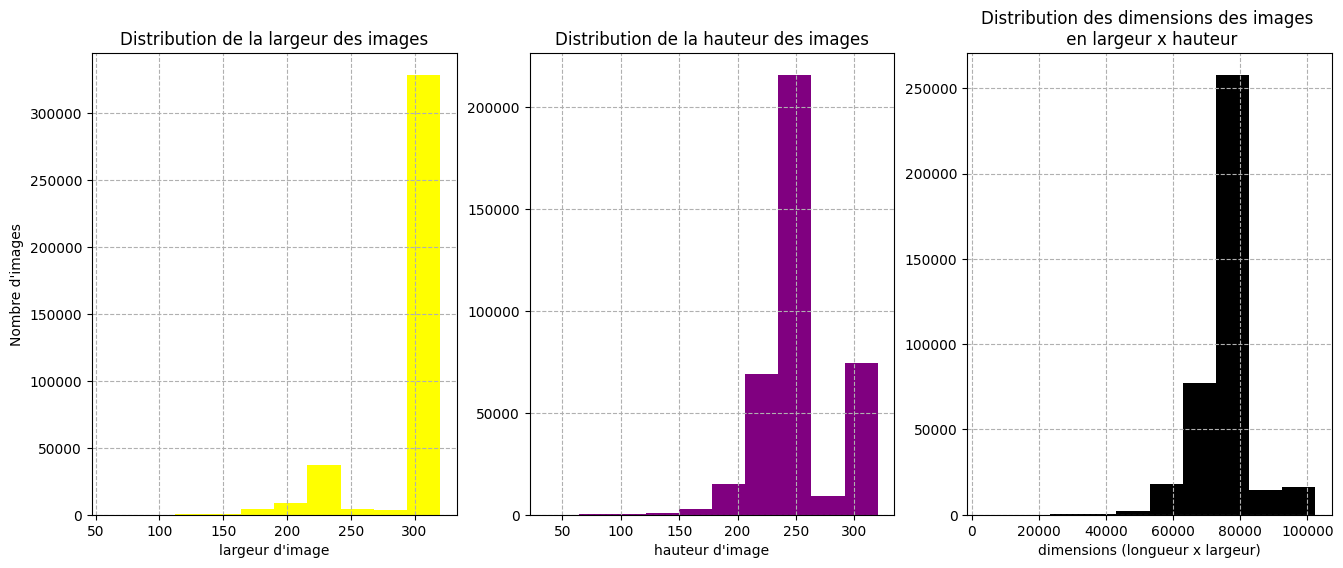

In [63]:
# On génère 3 graphs correspondant aux dimensions des images
features_df['dimensions'] = (features_df['largeur'] * features_df['hauteur'])
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16, 6))


# Graph des largeurs
ax1.hist(x = 'largeur', data = features_df, color='yellow')
ax1.set_title('Distribution de la largeur des images')
ax1.set_xlabel('largeur d\'image')
ax1.set_ylabel('Nombre d\'images')
ax1.grid(True, linestyle = '--')

# Graph des hauteurs
ax2.hist(x = 'hauteur', data = features_df, color='purple')
ax2.set_title('Distribution de la hauteur des images')
ax2.set_xlabel('hauteur d\'image')
ax2.grid(True, linestyle = '--')
ax2.sharey=ax1

# Grah des dimensions
ax3.hist(x = 'dimensions', data = features_df, color='black')
ax3.set_title('Distribution des dimensions des images \n en largeur x hauteur')
ax3.set_xlabel('dimensions (longueur x largeur)')
ax3.grid(True, linestyle = '--')
ax2.sharey=ax1;

### Analyses des canaux RGB

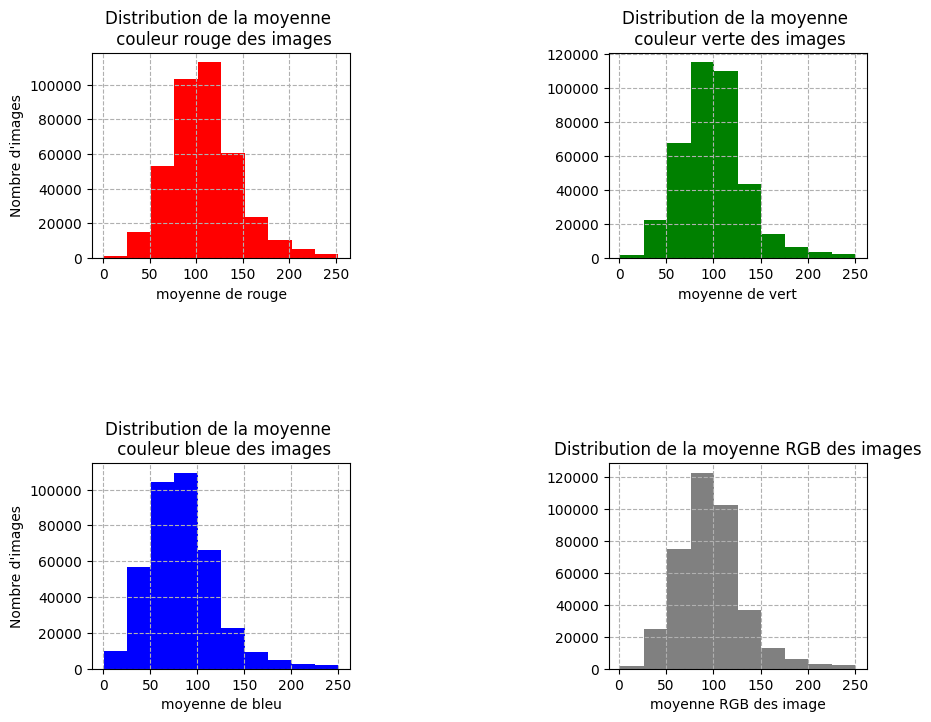

In [64]:
# On génère des graphs pour analsyer les canaux RGB de simages

fig, ((ax4,ax5),(ax6,ax7)) = plt.subplots(2,2, figsize=(10,8))
plt.subplots_adjust(wspace=1, hspace=1)

# Graph de la moyenne canal rouge des images
ax4.hist(x = 'moyenne_rouge', data = features_df, color='red')
ax4.set_title('Distribution de la moyenne \n couleur rouge des images')
ax4.set_xlabel('moyenne de rouge')
ax4.grid(True, linestyle = '--')
ax4.set_ylabel('Nombre d\'images')

# Graph de la moyenne canal vert des images
ax5.hist(x = 'moyenne_vert', data = features_df, color='green')
ax5.set_title('Distribution de la moyenne \n couleur verte des images')
ax5.set_xlabel('moyenne de vert')
ax5.grid(True, linestyle = '--')
ax5.sharey=ax4

# Graph de la moyenne canal bleu des images
ax6.hist(x = 'moyenne_bleu', data = features_df, color='blue')
ax6.set_title('Distribution de la moyenne \n couleur bleue des images')
ax6.set_xlabel('moyenne de bleu')
ax6.grid(True, linestyle = '--')
ax6.set_ylabel('Nombre d\'images')

# Graph de la moyenne RGB images
ax7.hist(x = 'moyenne_couleurs', data = features_df, color='gray')
ax7.set_title('Distribution de la moyenne RGB des images')
ax7.set_xlabel('moyenne RGB des image')
ax7.grid(True, linestyle = '--')
ax7.sharey=ax6

In [65]:
# On prépare un DF 'gb' qui permettra d'analyser plus profondément les canaux RGB par classe plutot qu'une tendance generale
features_df = features_df.merge(model_data_10_filtered, left_index=True, right_index=True)
features_df.drop(['image_lien', 'image_url', 'saison'], axis = 1, inplace = True)

gb = features_df.groupby('label').agg({
'largeur': 'mean',
'hauteur': 'mean',
'moyenne_rouge': 'mean',
'moyenne_vert': 'mean',
'moyenne_bleu': 'mean',
'moyenne_couleurs': 'mean',
'dimensions': 'sum'
})

gb.reset_index(inplace=True)
gb

NameError: name 'model_data_10_filtered' is not defined

In [66]:
# Construction du graph permettant de dagéger les moyennes de couleurs par classes
x = np.arange(len(gb))
fig, ax = plt.subplots(figsize=(8, 7))
width = 0.25  # Largeur des barres

rects1 = ax.bar(x - width, gb['moyenne_bleu'], width=width, label='bleu', color='blue')
rects2 = ax.bar(x, gb['moyenne_rouge'], width=width, label='rouge', color='red')
rects3 = ax.bar(x + width, gb['moyenne_vert'], width=width, label='vert', color='green')

ax.set_xlabel('Label')
ax.set_ylabel('Moyennes couleurs')
ax.set_title('Moyennes couleurs pour chaque espèce')
ax.set_xticks(x)
ax.set_xticklabels(gb['label'], rotation=45, ha='right')
plt.axhline(y=78, c='yellow')
ax.legend()


# Afficher le diagramme
plt.tight_layout()
plt.show()

NameError: name 'gb' is not defined